# Libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
%matplotlib inline

In [3]:
sns.set_style('darkgrid')

# Similarity Measures


In many areas of knowledge it of interest of the researcher to establish whether<br>
two different objects of study are similiar to each other in some kind of way.


For the machine learning problems every object or observation has a set of <br>
characteristics that describes this individual piece, these area called <br> 
features. The similarity measures are, then, used to know how these observations <br>
are similar to one another, or "near" for a more physical way analogy.

This notebooks shows a brief description of the following similarity measures:

- Euclidean Distance
- Manhattan Distance
- Chebyshev Distance (Supremum)
- Minkowski Distance
- Mahalanobis Distance
- Cosine Distance
- Simple Couple Similarity - binary data
- Jaccard Coefficient



## Euclidean Distance

The euclidean distance is calculated through the following formula:


$d_{(x_i, x_j)} = \sqrt{\sum\limits^d_{k=1} (x_{ik} - x_{jk})^2}$

It can be interpreted as the line length that connects two points in the space.

Importante observations:
- the "space" doesn't need to be in two dimensions, this distance is easily <br>
generalized for higher dimensions;
- this distance can be overshadowed by dimensions (or features in the case of <br>
Machine Learning) with bigger absolute values.


### Loding iris dataset

In [ ]:
from sklearn.metrics import euclidean_distances

In [4]:
from sklearn.datasets import load_iris

In [6]:
iris_info = load_iris()

In [17]:
df_iris = pd.DataFrame(iris_info.data, columns=iris_info.feature_names)
df_iris['species'] = iris_info.target
df_iris['species'] = df_iris['species'].replace(to_replace= [0, 1, 2], value = ['setosa', 'versicolor', 'virginica'])

In [18]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
df_iris.shape

(150, 5)

### Selecting observations

The iris dataset has 150 observation, for the example it will the chosen 2 at random.<br> 
Let's say, number 10 and number 75.

In [31]:
obs10 = df_iris.iloc[9, :-1].copy().to_numpy()
obs75 = df_iris.iloc[74, :-1].copy().to_numpy()

In [32]:
obs10

array([np.float64(4.9), np.float64(3.1), np.float64(1.5), np.float64(0.1)],
      dtype=object)

In [33]:
obs75

array([np.float64(6.4), np.float64(2.9), np.float64(4.3), np.float64(1.3)],
      dtype=object)

### Calculating euclidean distance

In [43]:
print("The eucliden distance for both observations:",euclidean_distances([obs10, obs75])[0,1])

The eucliden distance for both observations: 3.401470270338991


### Ilustration

Text(0, 0.5, 'sepal width')

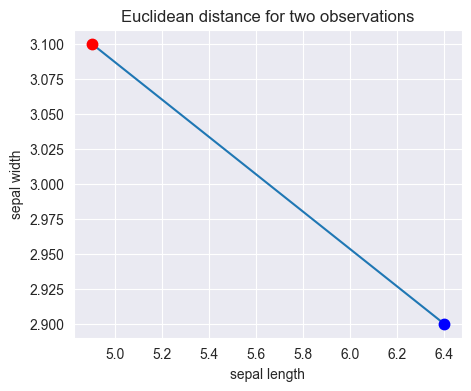

In [126]:
fig, ax = plt.subplots(figsize=(5,4))

ax.plot([obs10[0], obs75[0]], [obs10[1], obs75[1]])

x = [obs10[0]]
y = np.array([[obs10[1]]])
ax.plot(x, y, '.-', c='red', markersize=15)

x = [obs75[0]]
y = np.array([[obs75[1]]])
ax.plot(x, y, '.-', c='blue', markersize=15)

ax.set_title('Euclidean distance for two observations')
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')

## Manhattan Distance

The Manhattan Distance sums the length of the projection of the line segment between two points <br>
onto every coordinate axes. Its formulation is described as:

$ d_{x_i, x_j} = \sum\limits^d_{k=1} |x_{ik} - x_{jk}|$

- This distance can be computationally more efficient than the Euclidean distance
- Has better effectiveness with sparsed data (text, for example)
- Less prone to the effect of extreme values/outliers

### The manhattan_distances from sklearn library

In [99]:
from sklearn.metrics.pairwise import manhattan_distances

In [101]:
manhattan_distances([obs10, obs75])

array([[0. , 5.7],
       [5.7, 0. ]])

### Calculating manually the Manhattan Distance for the two observations from the iris dataset

In [103]:
sum(np.abs(obs75 - obs10))

np.float64(5.7)

### Ilustration

Text(0, 0.5, 'sepal width')

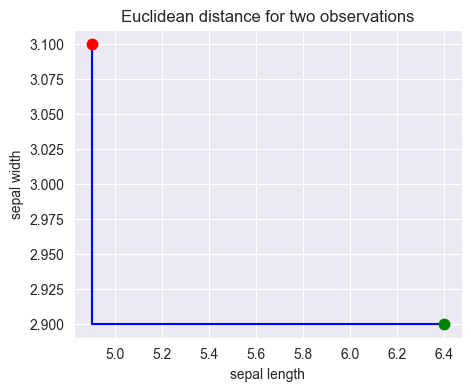

In [125]:
fig, ax = plt.subplots(figsize=(5,4))

ax.plot([obs10[0], obs10[0]], [obs10[1], obs75[1]], c='blue')
ax.plot([obs10[0], obs75[0]], [obs75[1], obs75[1]], c='blue')

x = [obs10[0]]
y = np.array([[obs10[1]]])
ax.plot(x, y, '.-', c='red', markersize=15)

x = [obs75[0]]
y = np.array([[obs75[1]]])
ax.plot(x, y, '.-', c='green', markersize=15)

ax.set_title('Euclidean distance for two observations')
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')